## Question 2 (A)

In [1]:
import pandas as pd

In [3]:
df_2_a = pd.read_csv('../Q1/Q1_b.csv')

Counting frequency of unique ingredients

In [4]:
freq_2_a = {}
for item in df_2_a['Ingredient Name']:
  if item in freq_2_a:
    freq_2_a[item] += 1
  else:
    freq_2_a[item] = 1

Storing List in Dataframe

In [5]:
arr_ingredient_2_a = []
arr_freq_2_a = []
for ing, freq in freq_2_a.items():
  arr_ingredient_2_a.append(ing)
  arr_freq_2_a.append(freq)

In [6]:
dict_2_a = {'Ingredient Name': arr_ingredient_2_a, 'Frequency': arr_freq_2_a}

In [7]:
required_df_2_a = pd.DataFrame(dict_2_a)
required_df_2_a = required_df_2_a.sort_values(by = 'Frequency', ascending=[False])

In [8]:
required_df_2_a

,Ingredient Name,Frequency
25,salt,3982
23,sugar,3918
30,butter,3395
20,onion,2781
38,garlic,2637
...,...,...
2690,orange rough y,1
2691,chicken drum sticks thighs,1
2693,pancakes,1
2694,hell on naise,1


## Question 2 (B)

In [13]:
import pandas as pd
df_2_b = pd.read_csv('../Q1/Q1_b.csv')

Storing recipe sizes

In [14]:
recipe_sizes_2_b = {}
for item in df_2_b['Recipe ID']:
  if item in recipe_sizes_2_b:
    recipe_sizes_2_b[item] += 1
  else:
    recipe_sizes_2_b[item] = 1

Storing frequency of each recipe size

In [15]:
freq_2_b = {}
for item in recipe_sizes_2_b.values():
  if item in freq_2_b:
    freq_2_b[item] += 1
  else:
    freq_2_b[item] = 1

In [16]:
from collections import OrderedDict
freq_2_b = OrderedDict(sorted(freq_2_b.items()))

In [17]:
arr_recipe_size = []
arr_size_freq = []
for key, value in freq_2_b.items():
  arr_recipe_size.append(key)
  arr_size_freq.append(value)

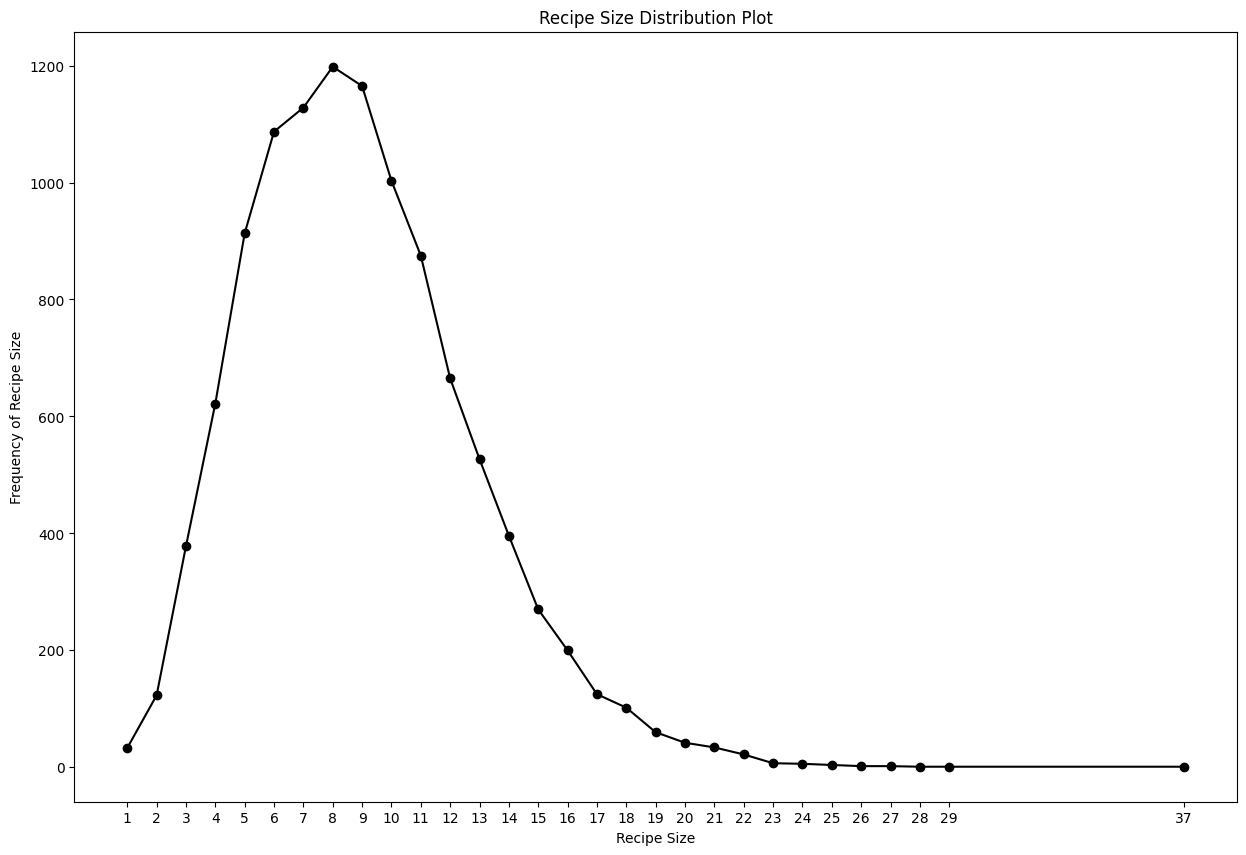

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('Recipe Size Distribution Plot')
plt.xlabel('Recipe Size')
plt.ylabel('Frequency of Recipe Size')
plt.plot(arr_recipe_size, arr_size_freq, '-ok')
plt.xticks(arr_recipe_size)
plt.savefig('Q2_b.svg')
plt.savefig('Q2_b.png')
plt.show()

Average Size of Recipes

In [22]:
sum_recipe_size = 0
sum_recipe = 0
for key, value in freq_2_b.items():
  sum_recipe_size += key * value
  sum_recipe += value

avg_size_recipe = round(sum_recipe_size/sum_recipe)
print(f"avg_size_recipe for the given data rounded to nearest integer is : {avg_size_recipe}")

avg_size_recipe for the given data rounded to nearest integer is : 9


## Question 2 (C)

In [24]:
import pandas as pd
df_2_b = pd.read_csv('../Q1/Q1_b.csv')

In [25]:
arr_recipe_size = []
arr_size_freq = []
for key, value in freq_2_b.items():
  arr_recipe_size.append(key)
  arr_size_freq.append(value)

Calculating CDF

In [26]:
arr_size_freq_sum = []
curr_sum = 0

for i in range(len(arr_size_freq)-1, -1, -1):
  curr_sum += arr_size_freq[i]
  arr_size_freq_sum.append(curr_sum)

arr_size_freq_sum.reverse()

Plotting CDF Plot

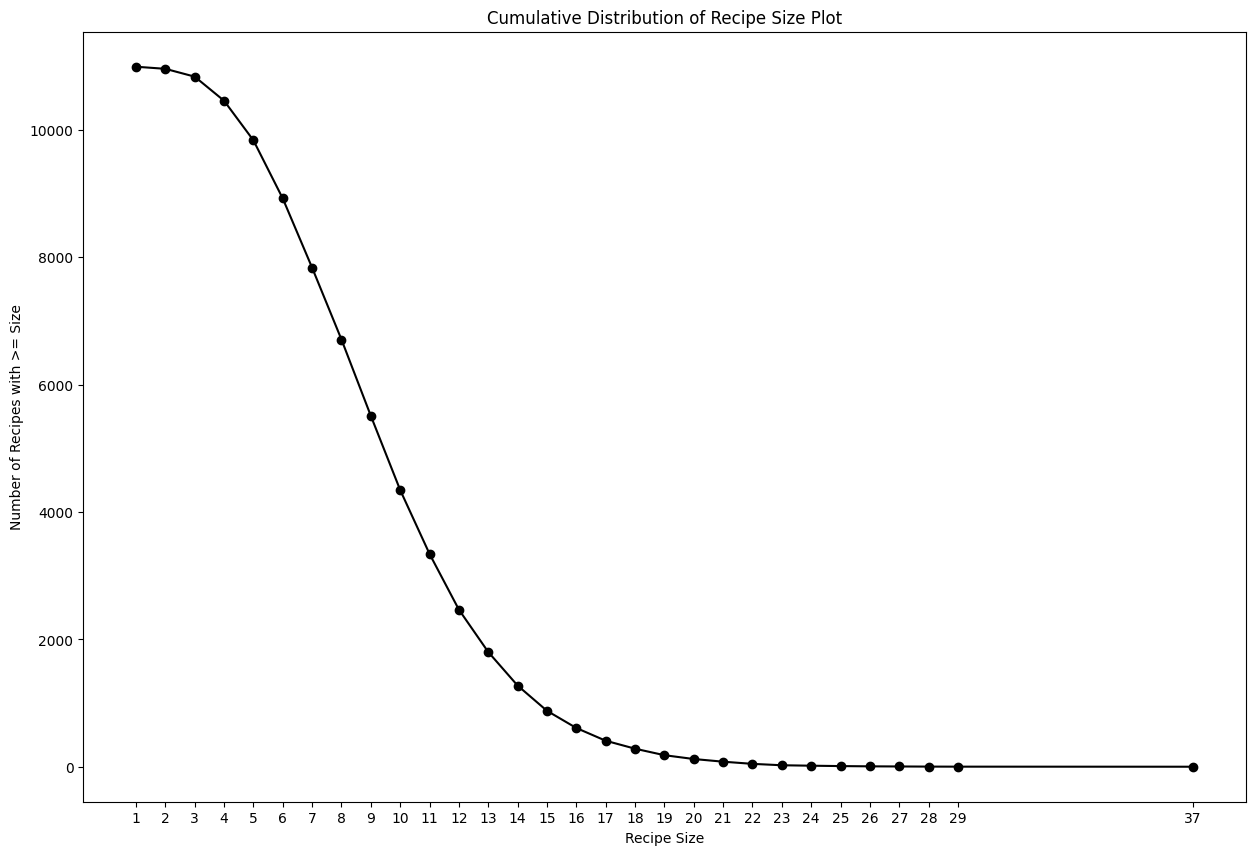

In [29]:
plt.figure(figsize=(15,10))
plt.title('Cumulative Distribution of Recipe Size Plot')
plt.xlabel('Recipe Size')
plt.ylabel('Number of Recipes with >= Size')
plt.plot(arr_recipe_size, arr_size_freq_sum, '-ok')
plt.xticks(arr_recipe_size)
plt.savefig('Q2_c.svg')
plt.savefig('Q2_c.png')
plt.show()

### CDF with probability

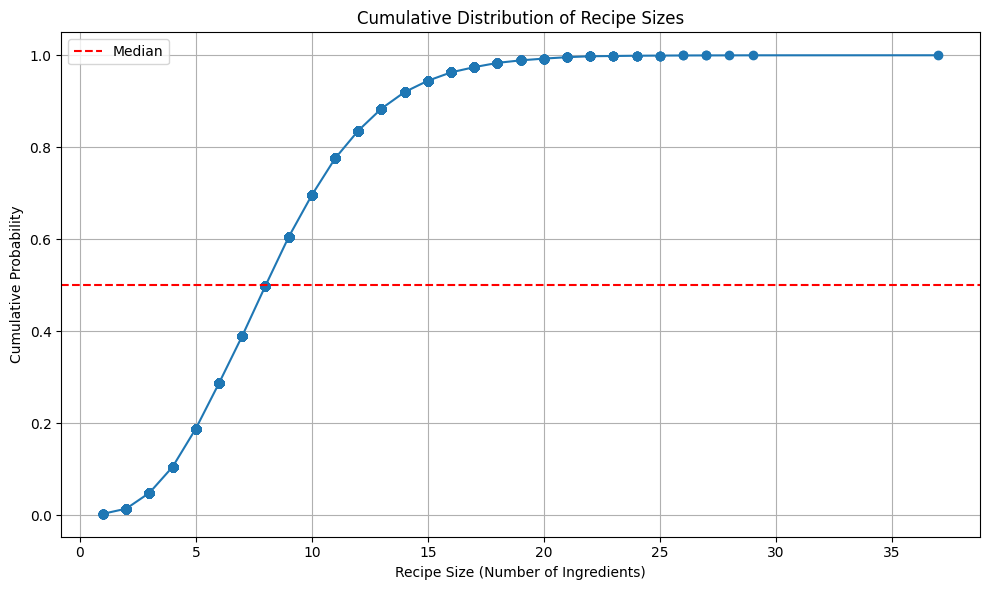

Minimum recipe size: 1
Maximum recipe size: 37
Median recipe size: 9.0
Mean recipe size: 8.91


<Figure size 640x480 with 0 Axes>

In [2]:
# y axis is cumalative probability
# x axis in recipe size


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
new_df_2 = pd.read_csv('../Q1/Q1_b.csv')

# Count the number of ingredients per recipe
recipe_sizes = new_df_2.groupby('Recipe ID').size().sort_values()

# Calculate cumulative probability
cumulative_prob = (recipe_sizes.rank(method='max') - 0.5) / len(recipe_sizes)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(recipe_sizes.values, cumulative_prob, marker='o')
plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Recipe Sizes')
plt.grid(True)

# Add a line at y=0.5 to show the median
plt.axhline(y=0.5, color='r', linestyle='--', label='Median')

plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Q2_c_prob.svg')
plt.savefig('Q2_c_prob.png')
# Print some statistics
print(f"Minimum recipe size: {recipe_sizes.min()}")
print(f"Maximum recipe size: {recipe_sizes.max()}")
print(f"Median recipe size: {recipe_sizes.median()}")
print(f"Mean recipe size: {recipe_sizes.mean():.2f}")